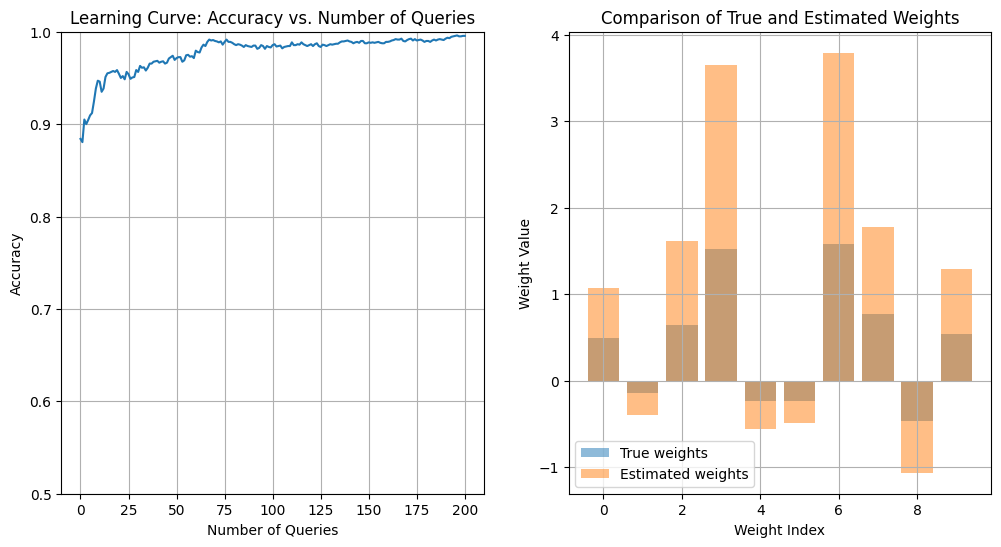

Final accuracy: 0.9955


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 2000  # Total number of data points
M = 10    # Dimensionality of the feature space
rho = 1   # Regularization parameter

# Generate random parameter w_a
w_a = np.random.randn(M)

# Generate random feature vectors
H = np.random.randn(N, M)

# Generate labels according to the logistic model
probabilities = 1 / (1 + np.exp(-H @ w_a))
labels = (probabilities >= 0.5).astype(int) * 2 - 1  # Convert to {-1, 1}

# Initialize weights
w = np.zeros(M)

# Active learning loop
n_labeled = 40
n_queries = 200
accuracies = []

# Initial labeled set
labeled_indices = np.random.choice(N, n_labeled, replace=False)
unlabeled_indices = np.setdiff1d(np.arange(N), labeled_indices)

 # Train logistic regression on labeled data
clf = LogisticRegression(C=1/rho, fit_intercept=False, max_iter=1000)

for i in range(n_queries + 1):
   
    clf.fit(H[labeled_indices], labels[labeled_indices])
    w = clf.coef_[0]
    
    # Compute and store accuracy for ALL data
    y_pred = clf.predict(H)
    accuracy = accuracy_score(labels, y_pred)
    accuracies.append(accuracy)
    
    if i < n_queries:
        # Select 20 random samples from unlabeled set
        sample_indices = np.random.choice(unlabeled_indices, 20, replace=False)
        
        # Compute confidence levels
        confidences = clf.predict_proba(H[sample_indices])[:, 1]
        
        # Select sample with least confidence
        least_confident = sample_indices[np.argmin(np.abs(0.5 - confidences))]
        
        # Move selected sample from unlabeled to labeled set
        labeled_indices = np.append(labeled_indices, least_confident)
        unlabeled_indices = np.setdiff1d(unlabeled_indices, least_confident)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=100)

# Plot accuracy curve
ax1.plot(accuracies)
ax1.set_title('Learning Curve: Accuracy vs. Number of Queries')
ax1.set_xlabel('Number of Queries')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.5, 1.0)  # Set y-axis limits for better visualization
ax1.grid(True)

# Compare final weights with true weights
ax2.bar(range(M), w_a, alpha=0.5, label='True weights')
ax2.bar(range(M), w, alpha=0.5, label='Estimated weights')
ax2.set_title('Comparison of True and Estimated Weights')
ax2.set_xlabel('Weight Index')
ax2.set_ylabel('Weight Value')
ax2.legend()
ax2.grid(True)

plt.show()

print(f"Final accuracy: {accuracies[-1]:.4f}")

In [ ]:
help(LogisticRegression)

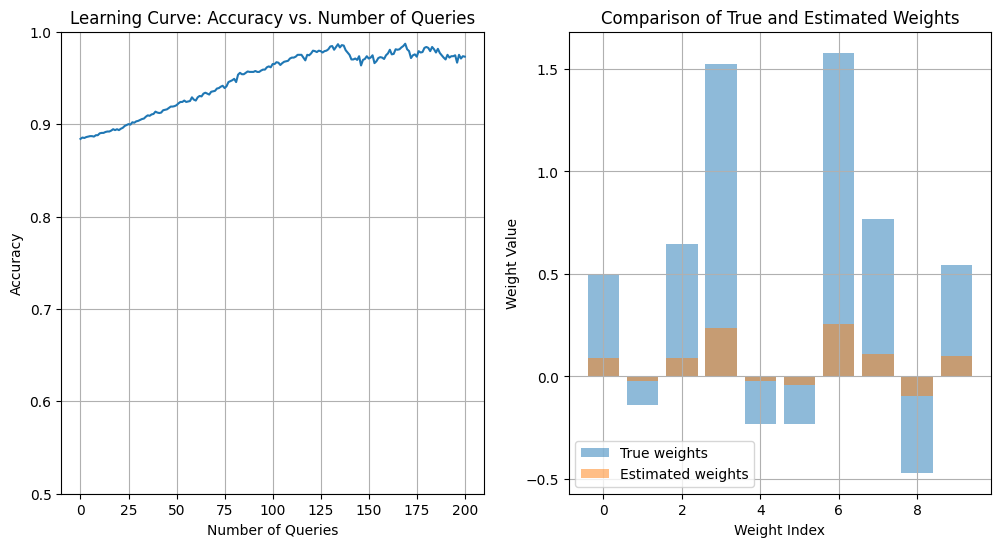

Final accuracy: 0.9730


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 2000  # Total number of data points
M = 10    # Dimensionality of the feature space
rho = 1   # Regularization parameter
learning_rate = 0.01  # Learning rate for gradient descent

# Generate random parameter w_a
w_a = np.random.randn(M)

# Generate random feature vectors
H = np.random.randn(N, M)

# Generate labels according to the logistic model
probabilities = 1 / (1 + np.exp(-H @ w_a))
labels = (probabilities >= 0.5).astype(int) * 2 - 1  # Convert to {-1, 1}

# Initialize weights
w = np.zeros(M)

# Active learning loop
n_labeled = 40
n_queries = 200
accuracies = []

# Initial labeled set
labeled_indices = np.random.choice(N, n_labeled, replace=False)
unlabeled_indices = np.setdiff1d(np.arange(N), labeled_indices)

# Train logistic regression on labeled data
clf = LogisticRegression(C=1/rho, fit_intercept=False, max_iter=1000)
clf.fit(H[labeled_indices], labels[labeled_indices])
w = clf.coef_[0]

for i in range(n_queries + 1):

    # Compute and store accuracy for ALL data
    y_pred = clf.predict(H)
    accuracy = accuracy_score(labels, y_pred)
    accuracies.append(accuracy)
    
    if i < n_queries:
        # Select 20 random samples from unlabeled set
        sample_indices = np.random.choice(unlabeled_indices, 20, replace=False)
        
        # Compute confidence levels
        confidences = clf.predict_proba(H[sample_indices])[:, 1]
        
        # Select sample with least confidence
        least_confident = sample_indices[np.argmin(np.abs(0.5 - confidences))]
        
        # Extract the selected sample and its label
        x_least_confident = H[least_confident]
        y_least_confident = labels[least_confident]
        
        # Update weights using one step of gradient descent
        z = x_least_confident @ w
        grad = -y_least_confident * x_least_confident / (1 + np.exp(y_least_confident * z)) + (1-2*rho*learning_rate) * w
        w -= learning_rate * grad
        
        # Update the classifier with the new weights
        clf.coef_ = np.array([w])

        # Move selected sample from unlabeled to labeled set
        labeled_indices = np.append(labeled_indices, least_confident)
        unlabeled_indices = np.setdiff1d(unlabeled_indices, least_confident)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=100)

# Plot accuracy curve
ax1.plot(accuracies)
ax1.set_title('Learning Curve: Accuracy vs. Number of Queries')
ax1.set_xlabel('Number of Queries')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.5, 1.0)  # Set y-axis limits for better visualization
ax1.grid(True)

# Compare final weights with true weights
ax2.bar(range(M), w_a, alpha=0.5, label='True weights')
ax2.bar(range(M), w, alpha=0.5, label='Estimated weights')
ax2.set_title('Comparison of True and Estimated Weights')
ax2.set_xlabel('Weight Index')
ax2.set_ylabel('Weight Value')
ax2.legend()
ax2.grid(True)

plt.show()

print(f"Final accuracy: {accuracies[-1]:.4f}")
